En el caso de que la funcion distribucion no pueda invertirse, se tiene que aplicar metodos especiales. Tomemos como ejemplo el caso en el que necesitemos generar numeros aleatorios a partir de una distribucion normal o gaussiana.
Sean dos V.A. X e Y normales estandard e independientes, son normales porque su funcion de densidad de probabilidad es la gaussiana, y son estandard porque su media es cero y su desviacion estandard es 1, mientras que independientes es porque el sorteo de una variable no tiene que ver con la otra (el resultado de X no depende de Y y viceversa).
Ahora defino dos nuevas variables: 

<center> 
$R^2=X^2+Y^2$
</center>

<center> 
$tan(\theta)=\frac{Y}{X}$
</center>

Como X e Y son independientes, la funcion de densidad de probabilidad conjunta f(X,Y) satisface:

$f(X,Y) = f(X) * f(Y)$

i.e.

<center>
$f(X,Y)=\frac{1}{\sqrt{2\pi}}exp(\frac{-X^2}{2})\frac{1}{\sqrt{2\pi}}exp(\frac{-Y^2}{2})=\frac{1}{2\pi}exp(\frac{-R^2}{2})$
</center>

Teniendo entonces la funcion de densidad de probabilidad de X e Y, las transformaciones de $R^2$ y $\theta$, entonces podemos aplicar el teorema de cambio de variables para obtener la funcion de densidad de probabilidad $f($R^2$,$\theta$)$. Esta ultima funcion nos da dos V.A. independientes mucho mas faciles de calcular, y al final vamos a proceder al reves: Con el teorema de cambio de variables, dados $R^2$ y $\theta$ obtenemos X e Y. La funcion es:

<center>
$f(R^2,\theta)=\frac{1}{2}\frac{1}{2\pi}exp(\frac{-R^2}{2})$
</center>

Donde el 1/2 proviene del determinante del Jacobiano y el factor el $1/2\pi$ seria la $f(\theta)$ y el resto es $f(R^2)$, y notar que esta ultima parte, no es una gaussiana, sino una exponencial, por lo cual usaremos la transformada de la funcion inversa para R^2 como en el problema 5. 
Por lo tanto sorteamos tita entre [0,$2\pi$] y R^2 con distribucion exponencial con lambda = 1/2


Para generar dos V.A. independientes usaremos coordenadas polares y luego las pasaremos de vuelta de rectangulares. De la siguiente manera se logra eso:

1) Generamos dos V.A. u1 y u2 que van en [0,1]

2) $R^2 = -2log(u1)$ (usamos la funcion inversa) y $\theta = 2\pi (u2)$ (asi nos queda uniforme entre 0 y $2\pi$)

3) $X = R  cos(\theta) = (-2log(u1))^\frac{1}{2} cos(2\pi (u2))$
   
   $Y = R  sin(\theta) = (-2log(u1))^\frac{1}{2} sin(2\pi (u2))$
Estas se conocen como transformaciones de Box-Muller 


In [5]:
from random import random 
import math
import numpy as np
import matplotlib.pyplot as plt

In [17]:
pi = math.pi
# Defino a pi

In [61]:
# Defino x e y como habiamos dicho y creo una lista de valores:
X = []
Y = []

for i in range (10000):
#     itero mcuchas veces, para que la distribucion se asemeje lo mas posible a la normal
    u1=random()
    u2=random()
    
    R =  (-2*math.log(u1))**0.5

    T = 2*pi*u2 

    x = R * math.cos(T)

    y = R * math.sin(T)
    
    X.append(x)
    Y.append(y)


Para ver que tiene una distribucion normal, hacemos un histograma

Text(0, 0.5, 'Conteo')

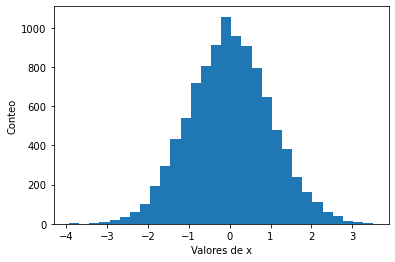

In [67]:
plt.hist(X, bins = 30)
plt.xlabel ('Valores de x')
plt.ylabel('Conteo')

Vemos que el pico se encuentra en x = 0, como deberia dar en teoria

Vemos como mejorar el codigo, pues el tema en cuestion es que calcular las funciones trigonometricas coseno y seno para la computadora es mucho trabajo, esto se puede aligerir cambiandolo de la siguiente forma:
Si u es uniforme en [0,1], entonces 2u es uniforme en [0;2] y si defino:

<center> 
$V = 2u - 1$
</center>

Entonces $V$ es uniforme en [-1;1] y si hacemos esto con $(u1,u2)$ generamos $(V1,V2)$, estaran uniformemente distruibuidos en un cuadrado de lado 2 con centro en el origen 


In [74]:
X2 = []
Y2 = []

for i in range (10000):

    u1=random()
    u2=random()
    V1 = 2*u1 -1
    V2 = 2*u2 -1
    S = V1**2 + V2**2
#    El radio del circulo es la unidad, por lo cual S no debe ser mayor a 1
    if S<=1:
        
        x = V1 * (-2*math.log(S)/S)**0.5
        
        y = V2 * (-2*math.log(S)/S)**0.5
#         Ver desarollo en 'Simulation' (Ross Sheldon) Cap. 5 pag. 74
        X2.append(x)
        Y2.append(y)

Text(0, 0.5, 'Conteo')

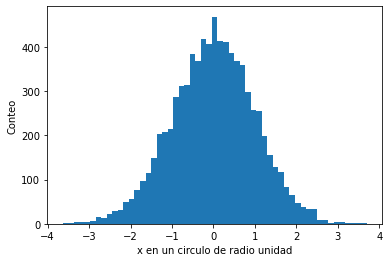

In [76]:
plt.hist(X2, bins ='fd')
plt.xlabel('x en un circulo de radio unidad')
plt.ylabel('Conteo')

Ahora quiero graficar X e Y, hago:

In [77]:
import seaborn as sns

Text(336.9714285714286, 0.5, 'Y')

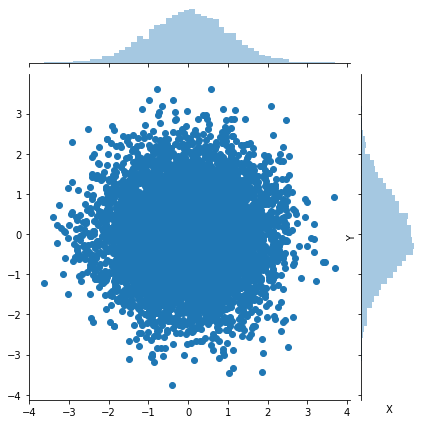

In [82]:
sns.jointplot(X2,Y2)
plt.xlabel('X')
plt.ylabel('Y')
# Nos grafica dos variables en el plano xy, y sus respectivas distribuciones

In [ ]:
Observemos que la distribucion se aproxima a un circulo. 
No llegue a hacer lo de los quantiles por falta de tiempo.